#### PROJECT GOAL: THE GOAL OF THE PROJECT IS TO TEST THE DEGREE OF EFFECTIVENESS OF SELECTED MACHINE LEARNING MODELS/ALGORITHMS TO PREDICT VALUE OF "AGE" FEATURE OF CRABS

In [309]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import lightgbm as lgb

#### LOADING TRAINING, TEST DATA

In [310]:
data_train = pd.read_csv("C:/Users/Krzysiek/Desktop/Kaggle competitions/Regression with a Crab Age Dataset/train.csv")
data_test = pd.read_csv("C:/Users/Krzysiek/Desktop/Kaggle competitions/Regression with a Crab Age Dataset/test.csv")

#### PRINTING DATA_TRAIN DATAFRAME

In [311]:
data_train

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


#### PRINTING DATA_TEST DATAFRAME

In [312]:
data_test

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
...,...,...,...,...,...,...,...,...,...
49363,123414,F,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309
49364,123415,I,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687
49365,123416,F,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345
49366,123417,F,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163


#### DATASET DUPLICATES CHECKING

In [313]:
amount_duplicated_values_train = data_train.duplicated().sum()
amount_duplicated_values_test = data_test.duplicated().sum()

percentage_duplicated_values_train = amount_duplicated_values_train/len(data_train)
percentage_duplicated_values_test = amount_duplicated_values_test/len(data_test)

print("Amount of duplicated observations in train dataset: {}".format(amount_duplicated_values_train))
print("Amount of duplicated observations in test dataset: {}".format(amount_duplicated_values_test))

print("% of duplicated observations in train dataset: {}".format(percentage_duplicated_values_train))
print("% of duplicated observations in test dataset: {}".format(percentage_duplicated_values_test))

Amount of duplicated observations in train dataset: 0
Amount of duplicated observations in test dataset: 0
% of duplicated observations in train dataset: 0.0
% of duplicated observations in test dataset: 0.0


#### DEFINING FUNCTION FOR BAR-PLOTTING MISSING VALUES IN DATASET

In [314]:
def Percentage_Missing_Values(df, missing_data_treshold):
    
    features_to_drop = []
            
    if df.isnull().sum().sum() != 0:
        
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
                      
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        
        f, ax = plt.subplots(figsize=(15, 12))
        plt.xticks(rotation='vertical')
        sns.barplot(x=na_df.index, y=na_df)
        
        ax.bar_label(ax.containers[0], fontsize=10, labels= round(na_df, 2))
        
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
        
        for missing_index, missing_value in zip(missing_data['Missing Ratio %'].index, missing_data['Missing Ratio %'].values):
            if missing_value > missing_data_treshold:
                features_to_drop.append(missing_index)
                        
        return features_to_drop
        
    else:
        print('No NAs found')

#### BAR-PLOTTING MISSING VALUES IN DATA_TRAIN AND DATA TEST

In [315]:
Percentage_Missing_Values(data_train, 10)

Percentage_Missing_Values(data_test, 10)

No NAs found
No NAs found


#### PLOTTING HISTOGRAM OF AGE FEATURE DISTRIBUTION

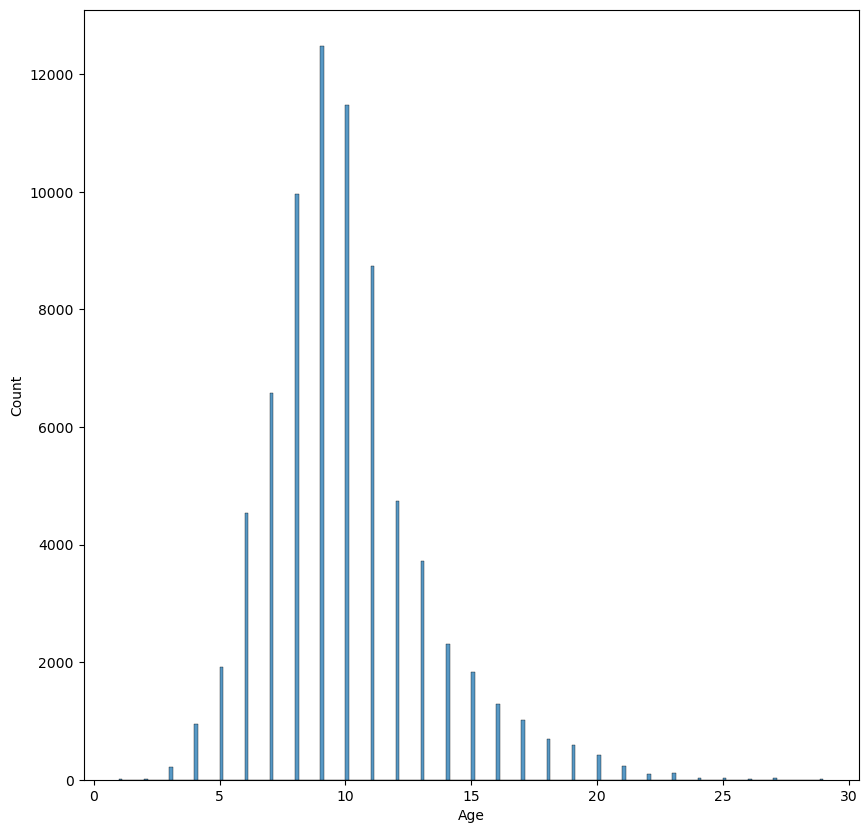

In [316]:
plt.figure(figsize = (10, 10))

sns.histplot(x= data_train['Age'])

plt.show()

#### PLOTTING PROBABILITY DENSITY FUNCTION OF AGE FEATURE

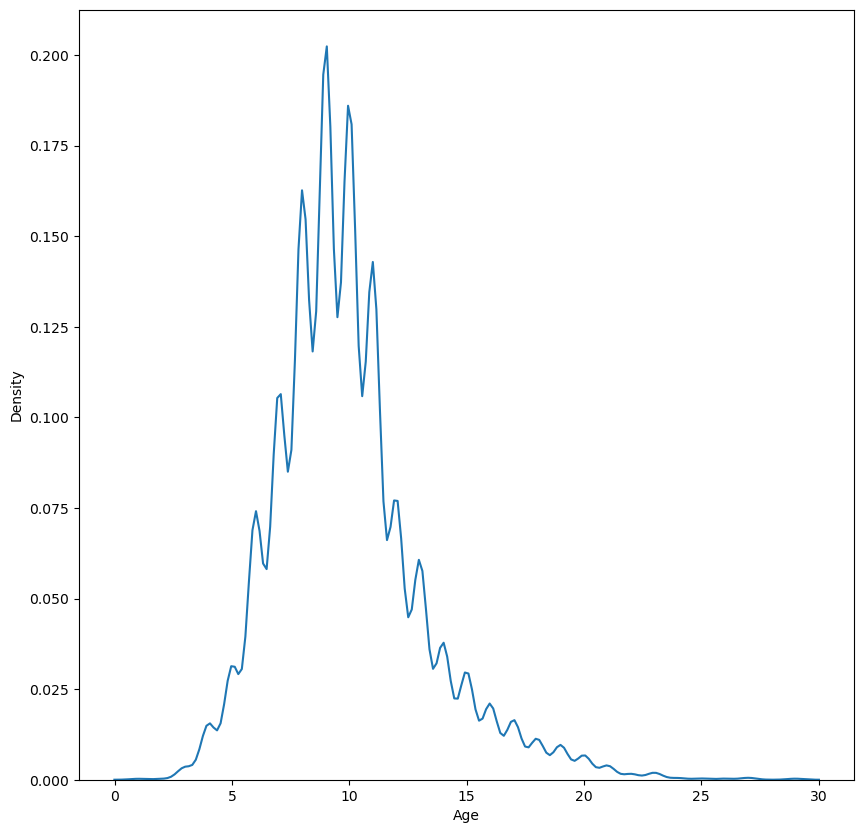

In [317]:
plt.figure(figsize = (10, 10))

sns.kdeplot(data=data_train, x="Age")

plt.show()

#### PLOTTING PEARSON CORRELATION MATRIX

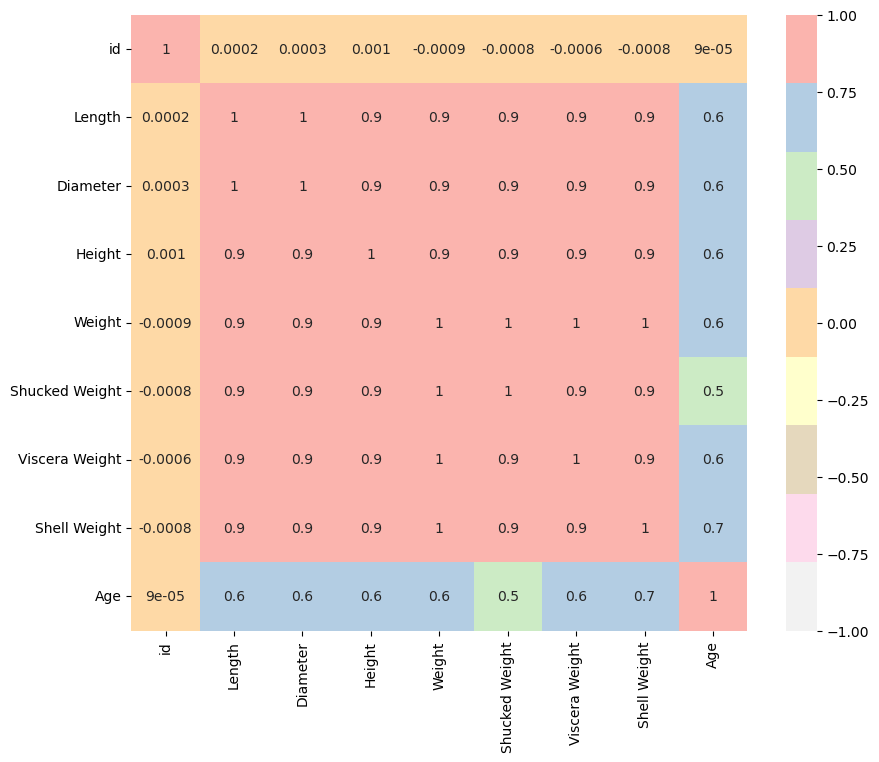

In [318]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_train.corr(),
            cmap='Pastel1_r',
            annot= True,
            fmt='.1g',
            vmin=-1.0,
            vmax=1.0,
            square=True,
            ax=ax)
plt.show()

#### DEFINING FUNCTION TO DROP MULTICORRELATED FEATURES

In [319]:
def corrX_orig(df, cut = 0.9) :
        
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
    
    drop = list()
    
    # For loop implements this pseudocode
    # For every cell in the upper triangle: 
        # If cell.value > 0.6: 
                # If mean(row_correlation) > mean(column_correlation):drop(column)
		# Else: drop(row)
        
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    drop.append(row)
                else: 
                    drop.append(col)
    
    drop_set = list(set(drop))
    dropcols_names = list(df.columns[[item for item in drop_set]])
    
    return(dropcols_names)


def corrX_new(df, cut = 0.9) :
       
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(np.bool))
    
    dropcols = list()
    
    res = pd.DataFrame(columns=(['v1', 'v2', 'v1.target', 
                                 'v2.target','corr', 'drop' ]))
    
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([ corr_mtx.index[row],
                up.columns[col],
                avg_corr[row],
                avg_corr[col],
                up.iloc[row,col],
                drop],
                index = res.columns)
        
                res = res.append(s, ignore_index = True)
    
    dropcols_names = calcDrop(res)
    
    return(dropcols_names)

#### APPLYING PREVIOUSLY DEFINED FUNCTIONS ON DATA_TRAIN

In [320]:
drop = corr_v1(data_train, 0.75)
print(drop)

drop_new = corr_v2(data_train, 0.75)
print(drop_new)
      
print(list(set(drop).difference(set(drop_new)))) 

['Sex', 'Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight']


C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_13760\1307838832.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(s, ignore_index = True)
C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_13760\1307838832.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(s, ignore_index = True)
C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_13760\1307838832.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(s, ignore_index = True)
C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_13760\1307838832.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(s, ignore_index = True)
C:\Users\Krz

['Diameter', 'Height', 'Shell Weight', 'Weight', 'Viscera Weight', 'Length']
['Shucked Weight', 'Sex']


C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_13760\1307838832.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(s, ignore_index = True)
C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_13760\1307838832.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(s, ignore_index = True)


#### CREATING DATASETS WHICH WILL KEEP WORKING DATA AND ORIGINAL DATA IN ORDER

In [321]:
dataset = [data_train, data_test]

#### DELETING MULTICORRELATED FEATURES

In [322]:
for data in dataset:
    del data['id']
    del data['Diameter'] 
    del data['Height']
    del data['Shell Weight']
    del data['Weight']
    del data['Viscera Weight']
    del data['Length']

#### PLOTTING BOXPLOT CHART FOR AGE FEATURE IN RELATION TO SEX FEATURE

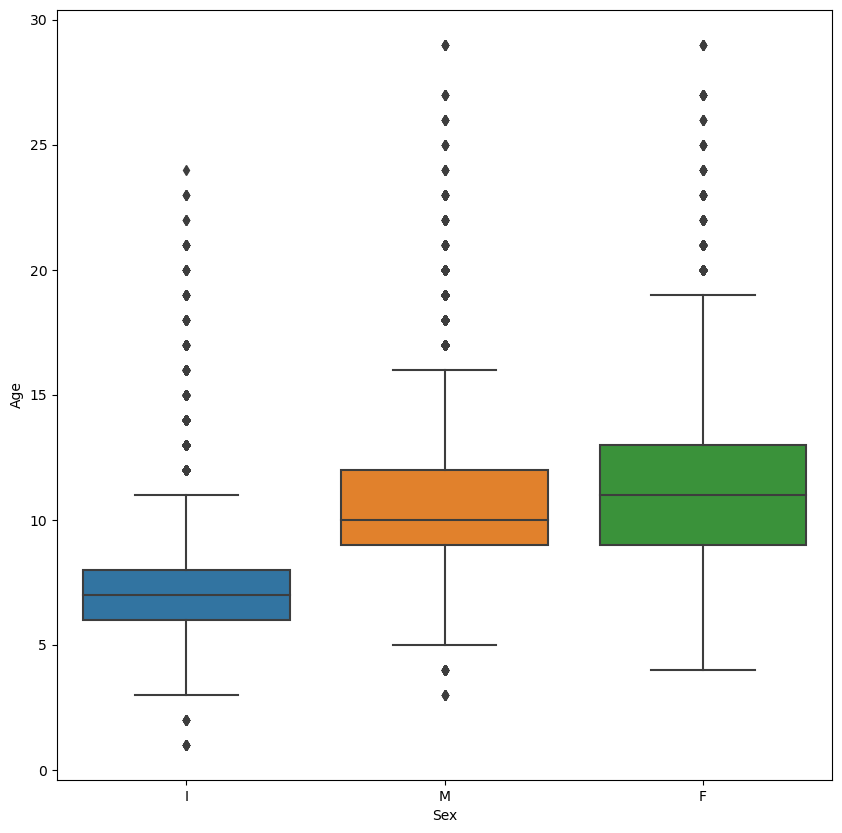

In [323]:
plt.figure(figsize = (10, 10))

sns.boxplot(x= data_train['Sex'], y= data_train['Age'])

plt.show()

#### PLOTTING SCATTER PLOT OF AGE FEATURE IN RELATION TO SHUCKED WEIGHT FEATURE

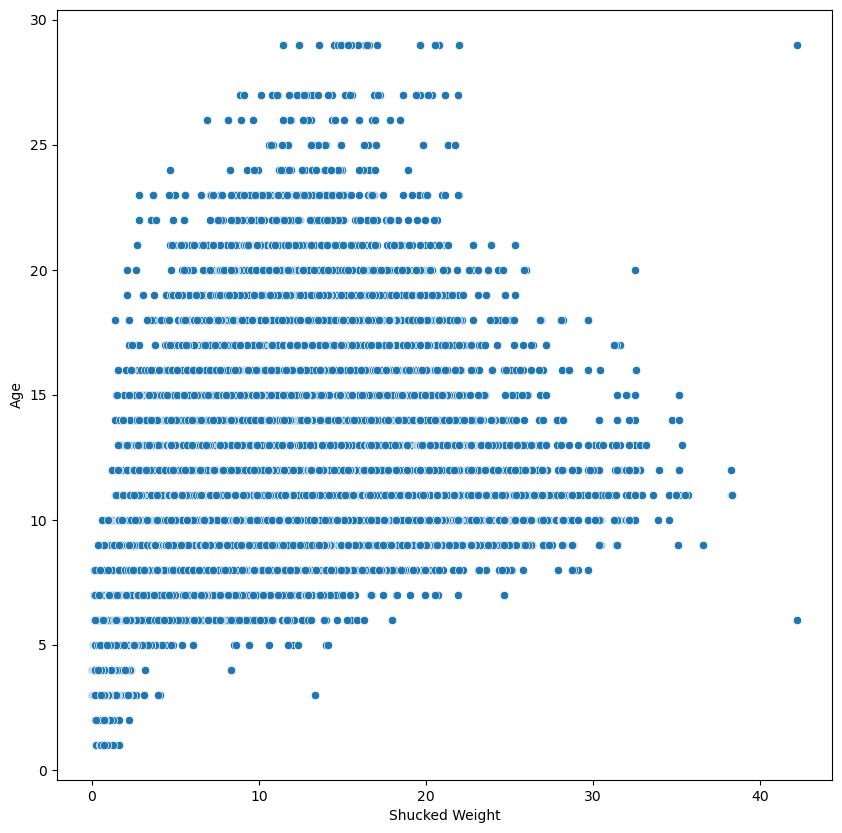

In [324]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x= data_train['Shucked Weight'], y= data_train['Age'])
plt.show()

#### APLLYING GET_DUMMIES METHOD ON SEX FEATURE; JOINING CREATED DATAFRAMES

In [325]:
sex_dummies_train = pd.get_dummies(data_train['Sex'], drop_first=True)

sex_dummies_test = pd.get_dummies(data_test['Sex'], drop_first=True)

data_train = pd.concat([data_train, sex_dummies_train], axis=1)

data_test = pd.concat([data_test, sex_dummies_test], axis=1)

#### DELETING SEX FEATURE FROM DATASET

In [326]:
dataset = [data_train, data_test]

for data in dataset:
    del data['Sex']

#### DEFINING X, Y, AND X_VAL

In [327]:
X = data_train.drop(['Age'], axis= 1)

y = data_train['Age']

X_val = data_test

#### APPLYING TRAIN_TEST SPLIT ON X AND Y

In [328]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

#### DEFINING CROSS-VALIDATION TO REMOVE OVERFITTING

In [329]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=None)

#### CREATING LIST WITH ALL REGRESSION MODELS

In [330]:
models = [
    make_pipeline(RobustScaler(), ElasticNet()), 
    make_pipeline(RobustScaler(), Lasso()),  
    make_pipeline(RobustScaler(), Ridge()),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
]

#### FITTING ALL MODELS TO TRAIN DATA, PRINTING SCORES ON TRAIN AND VAL DATA

In [331]:
model_name = []
score_train_list = []
score_val_list = []

for model in models:
    model.fit(X_train.values,y_train.values)
    score_train = cross_validate(model, X_train.values, y_train.values, cv=kfold, scoring= 'neg_mean_absolute_error', return_train_score=True)
    score_val = cross_validate(model, X_val.values, y_val.values, cv=kfold, scoring= 'neg_mean_absolute_error', return_train_score=True)
    model_name.append(type(model).__name__)
    print(score_train)
    score_train_list.append(-score_train['train_score'].mean())
    score_val_list.append(-score_val['train_score'].mean())
    print(type(model).__name__)
    print(-score_train['train_score'].mean())
    print(-score_val['train_score'].mean())

{'fit_time': array([0.01581311, 0.01550269, 0.01819086, 0.01656723, 0.01465487]), 'score_time': array([0.00300145, 0.0010004 , 0.00099921, 0.00199652, 0.00199485]), 'test_score': array([-2.15307762, -2.16191261, -2.13998893, -2.16383659, -2.13044081]), 'train_score': array([-2.15062766, -2.14922351, -2.15176982, -2.14592152, -2.15157359])}
Pipeline
2.1498232193803966
2.1534826675734733
{'fit_time': array([0.        , 0.        , 0.        , 0.01562142, 0.01562309]), 'score_time': array([0.01562452, 0.        , 0.        , 0.        , 0.        ]), 'test_score': array([-2.27785036, -2.29150884, -2.26815489, -2.29298602, -2.25445254]), 'train_score': array([-2.27765927, -2.27678615, -2.27922162, -2.27228229, -2.27885255])}
Pipeline
2.276960377162097
2.282659081641035
{'fit_time': array([0.01563001, 0.        , 0.        , 0.0193131 , 0.01239729]), 'score_time': array([0.        , 0.01561832, 0.        , 0.0017333 , 0.00100398]), 'test_score': array([-1.86216959, -1.86627649, -1.85578938,

#### PRINTING SCORES

In [332]:
overview = pd.concat([pd.DataFrame(model_name).rename(columns={pd.DataFrame(model_name).columns[0]: 'Model name'}), 
                      pd.DataFrame(score_train_list).rename(columns={pd.DataFrame(score_train_list).columns[0]: 'MAE score train'}),
                      pd.DataFrame(score_val_list).rename(columns={pd.DataFrame(score_val_list).columns[0]: 'MAE score val'})], 
                      axis=1)

overview

,Model name,MAE score train,MAE score val
0,Pipeline,2.149823,2.153483
1,Pipeline,2.276960,2.282659
2,Pipeline,1.861525,1.863930
3,GradientBoostingRegressor,1.750117,1.741505
4,XGBRegressor,1.701446,1.655636
5,LGBMRegressor,1.742214,1.728249


#### HYPERPARAMETER TUNING FOR BEST-PERFORMING MODEL

In [306]:
model = xgb.XGBRegressor()

param_grid = {'eta':[0.3, 0.4],
              'n_estimators':[500,1000,1500],
              'n_jobs':[3,4,5],
              'max_depth': [ 3, 4],
              'alpha':[2,3,4],
              'seed': [42]
             }

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', 
                    cv = kfold,
                    return_train_score=True)

# fitting the model for grid search 
grid.fit(X_train.values, y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

print(grid.best_score_)

print(grid.score(X_val.values, y_val))

{'alpha': 4, 'eta': 0.3, 'max_depth': 3, 'n_estimators': 500, 'n_jobs': 3, 'seed': 42}
XGBRegressor(alpha=4, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=3,
             num_parallel_tree=None, ...)
-1.7629080102371784
-1.75626542575329
